In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('HR.csv')

In [3]:
print("Columns names:")
print(data.columns.tolist())

Columns names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


In [4]:
data.shape

(14998, 10)

In [5]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Text(0.5, 1.0, 'Correlation between features')

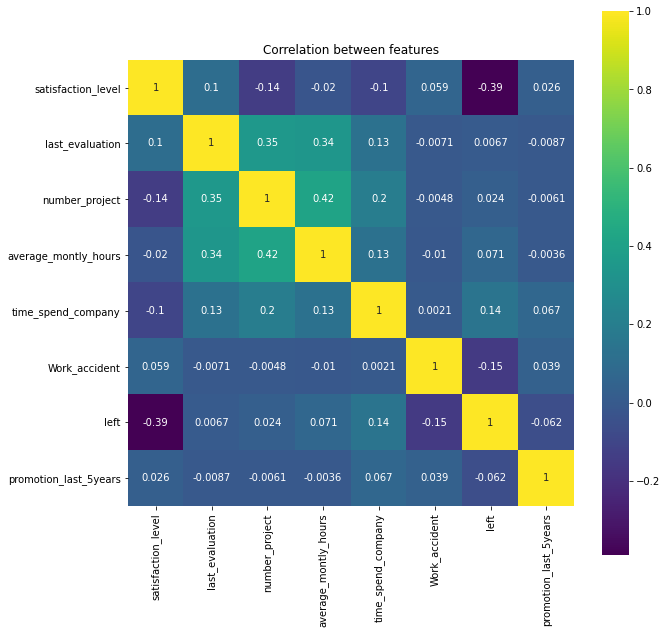

In [6]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between features')

In [7]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
sales=data.groupby('sales').sum()
sales

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,758.46,879.55,4683,248119,4256,164,273,3
RandD,487.80,560.44,3033,158030,2650,134,121,27
accounting,446.51,550.49,2934,154292,2702,96,204,14
hr,442.52,523.84,2701,146828,2480,89,215,15
management,391.45,456.12,2432,126787,2711,103,91,69
marketing,530.76,614.23,3164,171073,3063,138,203,43
product_mng,558.91,644.71,3434,180369,3135,132,198,0
sales,2543.81,2938.23,15634,831773,14631,587,1014,100
support,1377.82,1611.29,8477,447332,7560,345,554,20


In [9]:
groupby_sales=data.groupby('sales').mean()
groupby_sales

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618411,0.723200,3.804758,200.777379,3.393178,0.154847,0.248654,0.008977


In [10]:
IT=groupby_sales['satisfaction_level'].IT
RandD=groupby_sales['satisfaction_level'].RandD
accounting=groupby_sales['satisfaction_level'].accounting
hr=groupby_sales['satisfaction_level'].hr
management=groupby_sales['satisfaction_level'].management
marketing=groupby_sales['satisfaction_level'].marketing
product_mng=groupby_sales['satisfaction_level'].product_mng
sales=groupby_sales['satisfaction_level'].sales
support=groupby_sales['satisfaction_level'].support
technical=groupby_sales['satisfaction_level'].technical
technical

0.6078970588235295

Text(0.5, 1.0, 'Mean Satisfaction Level of each department')

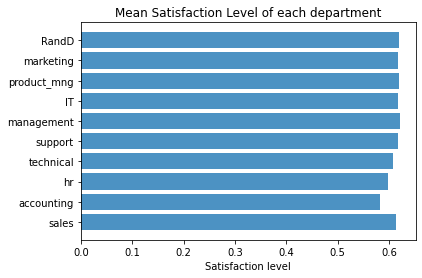

In [11]:
department_name=('sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD')
department=(sales, accounting, hr, technical, support, management,
       IT, product_mng, marketing, RandD)
y_pos = np.arange(len(department))
x=np.arange(0,1,0.1)

plt.barh(y_pos, department, align='center', alpha=0.8)
plt.yticks(y_pos,department_name )
plt.xlabel('Satisfaction level')
plt.title('Mean Satisfaction Level of each department')

In [12]:
data['salary'] = data['salary'].map( {'low': 1, 'medium': 2, 'high':3} ).astype(int)
data['sales'] = data['sales'].map( {'accounting': 1, 'hr': 2, 'IT':3, 'management':4, 'marketing':5, 'product_mng':6, 'RandD':7, 'sales':8, 'support':9, 'technical':10} ).astype(int)

In [13]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,8,1
1,0.80,0.86,5,262,6,0,1,0,8,2
2,0.11,0.88,7,272,4,0,1,0,8,2
3,0.72,0.87,5,223,5,0,1,0,8,1
4,0.37,0.52,2,159,3,0,1,0,8,1


In [14]:
columns = data.columns.tolist()
columns

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [15]:
columns.insert(0, columns.pop(columns.index('left')))
columns

['left',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'sales',
 'salary']

In [16]:
data = data.reindex(columns= columns)
data.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,1,0.38,0.53,2,157,3,0,0,8,1
1,1,0.80,0.86,5,262,6,0,0,8,2
2,1,0.11,0.88,7,272,4,0,0,8,2
3,1,0.72,0.87,5,223,5,0,0,8,1
4,1,0.37,0.52,2,159,3,0,0,8,1


Text(0.5, 1.0, 'Correlation between features')

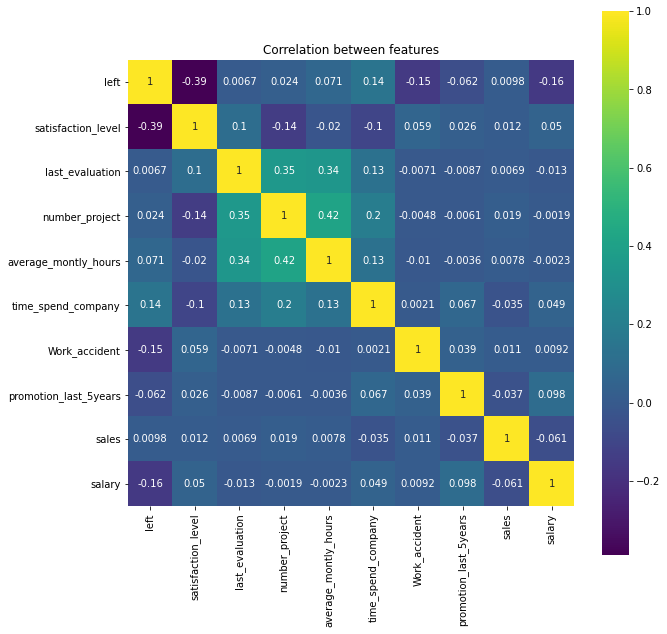

In [17]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between features')

In [18]:
X = data.iloc[:,1:10].values
y = data.iloc[:,0].values
X

array([[0.38, 0.53, 2.  , ..., 0.  , 8.  , 1.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 8.  , 2.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 8.  , 2.  ],
       ...,
       [0.37, 0.48, 2.  , ..., 0.  , 9.  , 1.  ],
       [0.37, 0.53, 2.  , ..., 0.  , 9.  , 1.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 9.  , 1.  ]])

In [19]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [20]:
np.shape(X)

(14998, 9)

In [21]:
np.shape(y)

(14998,)

In [22]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [23]:
X_std

array([[-0.93655838, -1.08736302, -1.46301606, ..., -0.14741684,
         0.38722961, -0.93342617],
       [ 0.75274806,  0.8406393 ,  0.9710523 , ..., -0.14741684,
         0.38722961,  0.63602738],
       [-2.02254108,  0.95748793,  2.59376453, ..., -0.14741684,
         0.38722961,  0.63602738],
       ...,
       [-0.97677996, -1.37948458, -1.46301606, ..., -0.14741684,
         0.75123272, -0.93342617],
       [-0.97677996, -1.08736302, -1.46301606, ..., -0.14741684,
         0.75123272, -0.93342617],
       [-2.02254108,  1.42488243,  1.78240841, ..., -0.14741684,
         0.75123272, -0.93342617]])

In [24]:
mean_vec = np.mean(X_std)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix', cov_mat)

Covariance matrix [[ 1.00006668  0.10496153 -0.14308915 -0.02010673 -0.10089862  0.05867657
   0.02559813  0.01231118  0.04996807]
 [ 0.10496153  1.00006668  0.34928433  0.33972188  0.1315797  -0.00713653
  -0.008696    0.00686793 -0.01307464]
 [-0.14308915  0.34928433  1.00006668  0.41719447  0.19678053 -0.00478134
  -0.00607918  0.01915416 -0.00189432]
 [-0.02010673  0.33972188  0.41719447  1.00006668  0.12774748 -0.01016751
  -0.00355321  0.00776624 -0.0022958 ]
 [-0.10089862  0.1315797   0.19678053  0.12774748  1.00006668  0.00211122
   0.06743438 -0.03481117  0.04869882]
 [ 0.05867657 -0.00713653 -0.00478134 -0.01016751  0.00211122  1.00006668
   0.03924426  0.01134518  0.00922267]
 [ 0.02559813 -0.008696   -0.00607918 -0.00355321  0.06743438  0.03924426
   1.00006668 -0.03694979  0.09811936]
 [ 0.01231118  0.00686793  0.01915416  0.00776624 -0.03481117  0.01134518
  -0.03694979  1.00006668 -0.06052379]
 [ 0.04996807 -0.01307464 -0.00189432 -0.0022958   0.04869882  0.00922267
   0

In [25]:
print('NumPy covariance matrix:', np.cov(X_std.T))

NumPy covariance matrix: [[ 1.00006668  0.10496153 -0.14308915 -0.02010673 -0.10089862  0.05867657
   0.02559813  0.01231118  0.04996807]
 [ 0.10496153  1.00006668  0.34928433  0.33972188  0.1315797  -0.00713653
  -0.008696    0.00686793 -0.01307464]
 [-0.14308915  0.34928433  1.00006668  0.41719447  0.19678053 -0.00478134
  -0.00607918  0.01915416 -0.00189432]
 [-0.02010673  0.33972188  0.41719447  1.00006668  0.12774748 -0.01016751
  -0.00355321  0.00776624 -0.0022958 ]
 [-0.10089862  0.1315797   0.19678053  0.12774748  1.00006668  0.00211122
   0.06743438 -0.03481117  0.04869882]
 [ 0.05867657 -0.00713653 -0.00478134 -0.01016751  0.00211122  1.00006668
   0.03924426  0.01134518  0.00922267]
 [ 0.02559813 -0.008696   -0.00607918 -0.00355321  0.06743438  0.03924426
   1.00006668 -0.03694979  0.09811936]
 [ 0.01231118  0.00686793  0.01915416  0.00776624 -0.03481117  0.01134518
  -0.03694979  1.00006668 -0.06052379]
 [ 0.04996807 -0.01307464 -0.00189432 -0.0022958   0.04869882  0.009222

In [28]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors', eig_vecs)
print('\nEigenvalues', eig_vals)

Eigenvectors [[ 0.08786236  0.29795043  0.28042975  0.24152212 -0.7510221   0.35156592
  -0.25207058 -0.11790224  0.03819229]
 [-0.506938   -0.31575773 -0.70019872  0.01475785 -0.33240473  0.08976444
  -0.15839416 -0.09369226 -0.01993418]
 [-0.5788949   0.77536824 -0.01998229 -0.067605    0.08075    -0.20891562
   0.06283934  0.06706071 -0.01014083]
 [-0.54903569 -0.45055749  0.63744399 -0.03813088 -0.12057633 -0.26268532
  -0.06309295  0.00515565 -0.01481288]
 [-0.31337662 -0.05012978  0.13107186  0.23400302  0.37368799  0.80258217
   0.20689595  0.00972916  0.02575692]
 [ 0.01923194 -0.04362469 -0.03614825  0.22753642 -0.30051031 -0.08803479
   0.72336761  0.21946819 -0.52456072]
 [-0.00993092  0.00086786 -0.03316924  0.58831305  0.08456884 -0.27343975
   0.23966664 -0.64304613  0.31594078]
 [-0.00734243 -0.03638389 -0.00977784 -0.35397562 -0.25518319  0.06590213
   0.4933347   0.15846827  0.73162496]
 [-0.0026965  -0.03979927 -0.0682967   0.59789936  0.04684199 -0.15714258
  -0.1911

In [37]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Sorted Eigenvalues:')
for i in eig_pairs:
    print(i[0])

Sorted Eigenvalues:
1.830141070281258
1.1752367269602078
1.1305468334359745
1.0005598638967783
0.95039701854154
0.8924834832520143
0.8419506048022624
0.6321323932690112
0.5471521255849596


In [38]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

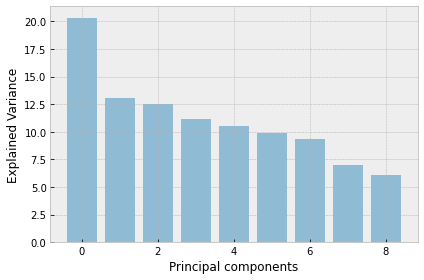

In [42]:
with plt.style.context('bmh'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(9), var_exp, alpha=0.5, align='center')
    plt.ylabel('Explained Variance')
    plt.xlabel('Principal components')
    plt.tight_layout()

In [62]:
PCA_matrix = np.hstack((eig_pairs[0][1].reshape(9,1), 
                      eig_pairs[1][1].reshape(9,1),
                      eig_pairs[2][1].reshape(9,1), 
                      eig_pairs[3][1].reshape(9,1),
                      eig_pairs[4][1].reshape(9,1), 
                      eig_pairs[5][1].reshape(9,1),
                      eig_pairs[6][1].reshape(9,1),
                    ))
print('New matrix:\n', PCA_matrix)

New matrix:
 [[ 0.08786236  0.24152212 -0.7510221  -0.25207058  0.03819229 -0.11790224
   0.35156592]
 [-0.506938    0.01475785 -0.33240473 -0.15839416 -0.01993418 -0.09369226
   0.08976444]
 [-0.5788949  -0.067605    0.08075     0.06283934 -0.01014083  0.06706071
  -0.20891562]
 [-0.54903569 -0.03813088 -0.12057633 -0.06309295 -0.01481288  0.00515565
  -0.26268532]
 [-0.31337662  0.23400302  0.37368799  0.20689595  0.02575692  0.00972916
   0.80258217]
 [ 0.01923194  0.22753642 -0.30051031  0.72336761 -0.52456072  0.21946819
  -0.08803479]
 [-0.00993092  0.58831305  0.08456884  0.23966664  0.31594078 -0.64304613
  -0.27343975]
 [-0.00734243 -0.35397562 -0.25518319  0.4933347   0.73162496  0.15846827
   0.06590213]
 [-0.0026965   0.59789936  0.04684199 -0.19119717  0.29478924  0.6970765
  -0.15714258]]


In [93]:
Y = X_std.dot(PCA_matrix)
principalDf = pd.DataFrame(data = Y , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7']) 
finalDf = pd.concat([principalDf,pd.DataFrame(y,columns = ['left'])], axis = 1) 
finalDf.head(2600)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,left
0,1.900338,-1.065008,0.894080,0.338163,0.182277,-0.478430,0.085319,1
1,-2.140099,0.545887,-0.231158,-0.247725,0.668114,0.429847,1.193857,1
2,-3.063248,-0.560544,1.409340,0.239279,0.505088,0.842638,-1.262288,1
3,-1.550388,-0.599826,-0.244205,0.031779,0.185929,-0.642408,0.988074,1
4,1.904434,-1.077112,0.938880,0.355029,0.181312,-0.468008,0.055414,1
...,...,...,...,...,...,...,...,...
2595,-0.801206,0.271161,-1.505630,-0.885261,0.638791,0.225712,0.218486,0
2596,0.901831,1.074652,0.244564,-1.695446,-1.191418,0.029115,-0.072019,0
2597,-0.087698,-0.328413,-0.587531,-0.384419,0.854934,0.478145,-0.645830,0
2598,-0.998657,0.199601,-0.932929,2.174873,-0.372855,1.296012,-0.625370,0


In [94]:
finalDf.head(2600)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,left
0,1.900338,-1.065008,0.894080,0.338163,0.182277,-0.478430,0.085319,1
1,-2.140099,0.545887,-0.231158,-0.247725,0.668114,0.429847,1.193857,1
2,-3.063248,-0.560544,1.409340,0.239279,0.505088,0.842638,-1.262288,1
3,-1.550388,-0.599826,-0.244205,0.031779,0.185929,-0.642408,0.988074,1
4,1.904434,-1.077112,0.938880,0.355029,0.181312,-0.468008,0.055414,1
...,...,...,...,...,...,...,...,...
2595,-0.801206,0.271161,-1.505630,-0.885261,0.638791,0.225712,0.218486,0
2596,0.901831,1.074652,0.244564,-1.695446,-1.191418,0.029115,-0.072019,0
2597,-0.087698,-0.328413,-0.587531,-0.384419,0.854934,0.478145,-0.645830,0
2598,-0.998657,0.199601,-0.932929,2.174873,-0.372855,1.296012,-0.625370,0


In [90]:
y

array([1, 1, 1, ..., 1, 1, 1])

Text(0, 0.5, 'Cumulative explained variance')

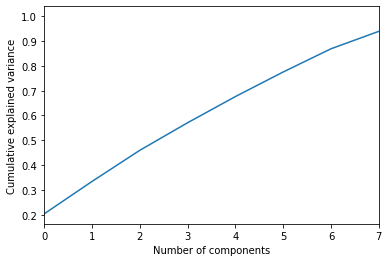

In [95]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [96]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=7)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [97]:
print(Y_sklearn)

[[-1.90033777 -1.06500841  0.89408037 ...  0.1822768   0.4784301
   0.08531909]
 [ 2.14009933  0.54588679 -0.23115755 ...  0.66811388 -0.42984665
   1.19385747]
 [ 3.06324793 -0.56054443  1.40933999 ...  0.505088   -0.84263776
  -1.26228824]
 ...
 [-2.00923817 -1.21017264  0.92125978 ...  0.4519878   0.38832572
   0.05316554]
 [-2.04804009 -1.19288197  0.86520087 ...  0.45120684  0.41745021
   0.16880465]
 [ 2.91688666 -1.57212651  1.00274037 ...  0.30528162  0.29108398
  -0.82228988]]


In [98]:
Y_sklearn.shape

(14998, 7)